In [75]:
!wget https://www.dropbox.com/s/53xyievbdpr7bl0/IBM.csv

--2022-12-06 10:01:19--  https://www.dropbox.com/s/53xyievbdpr7bl0/IBM.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/53xyievbdpr7bl0/IBM.csv [following]
--2022-12-06 10:01:19--  https://www.dropbox.com/s/raw/53xyievbdpr7bl0/IBM.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd24bccb45f53fb5b714ea54d97.dl.dropboxusercontent.com/cd/0/inline/ByHwKLpRTUGPRgQ8C09o86UcDx2rCxVrw3zk-k0F--22tJXK63kTv4vFSAd2JdKUMT8z97Duvht3IlM937eNdniyNMMolgC9HKuM3uH_yw5IlSQzVB91iBb8Nf-HrQy19fpSAlrdpiD7sG22aTCInY-UuKnhppc0JGLlEWAhbBrsVQ/file# [following]
--2022-12-06 10:01:20--  https://ucd24bccb45f53fb5b714ea54d97.dl.dropboxusercontent.com/cd/0/inline/ByHwKLpRTUGPRgQ8C09o86UcDx2rCxVrw3zk-k0F--22tJXK63kTv4vFSAd2JdKUMT8z97Duvht3IlM937eNdniyNMMolgC

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")    
import os

df_ibm = pd.read_csv("IBM.csv")
print(df_ibm.shape)
print(df_ibm.head())
print(df_ibm.columns)

(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

Employee retention is one of the biggest metrics that a company should have in mind when thinking of growth. Employee attrition is caused when the total strength of the company is greatly reduced as more employees leave the company than expected.

So, what is **Attrition**?
It is basically the turnover rate of employees in a particular organization

Reasons for **Attrition**:

- Employees looking for better opportunities
- A negative working environment
- Bad management
- Sickness of an employee
- Excessive working hours

####**Problem Statement**
Uncover the factors that lead to employee attrition and explore the reasons as to why people are leaving the organization 

####**Tasks to be performed**


**Task 1:**
       
         What is the distribution of the Age & MothlyIncome columns in the data set? 


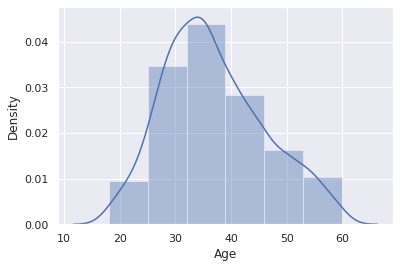

In [ ]:
df_ibm.Age.min(), df_ibm.Age.max()

sns.set()

sns.distplot(df_ibm.Age, kde=True, bins=6)

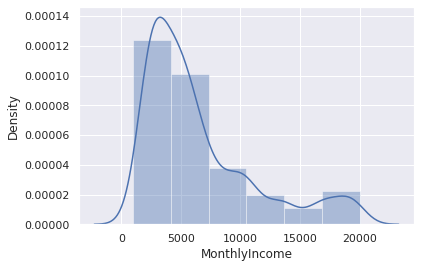

In [ ]:
sns.distplot(df_ibm.MonthlyIncome, kde=True, bins=6)

**Task 2:**   

         What's the Attrition percentage in the company? 
         Which Department of the company has the highest Attrition rate?


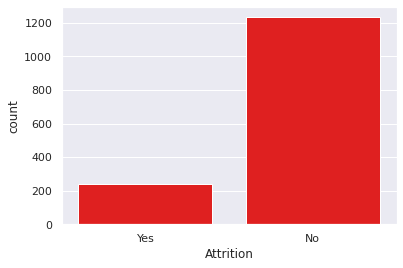

In [72]:
sns.countplot(df_ibm.Attrition, color="RED")


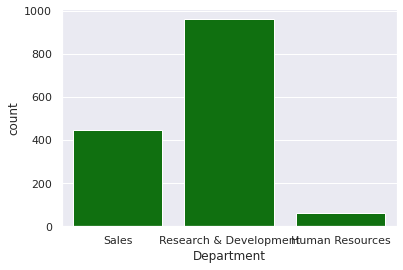

In [73]:
sns.countplot(df_ibm.Department, color='green')

In [77]:
ayes = round((df[df.Attrition == 'Yes']['Attrition'].count()) * 100/len(df), 2)
ano = round((df[df.Attrition == 'No']['Attrition'].count()) * 100/len(df), 2)
print(ayes, ano)

16.12 83.88


Text(1, 700, '83.88')

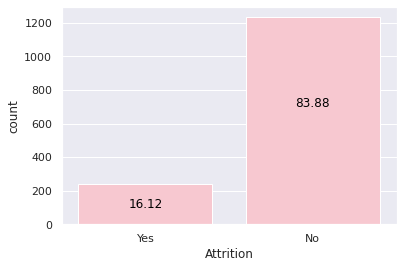

In [78]:
ax = sns.countplot(df.Attrition, color='pink')
ax.text(0, 100, ayes, color='black', ha='center')
ax.text(1, 700, ano, color='black', ha='center')

**Task 3:**

         Which gender is more likely to leave?
         Does distance from home affect attrition rate?
         How does the monthly income affect the attrition rate? 



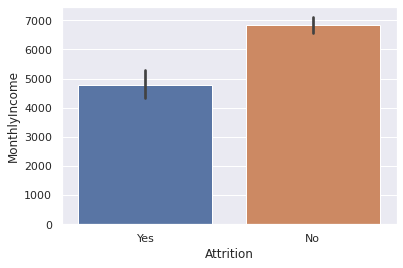

In [79]:
sns.barplot(x='Attrition', y='MonthlyIncome', data=df)

In [80]:
newdf = df['Gender'].groupby(df['Attrition']).value_counts(normalize=True).rename('Percentage of Group').reset_index()
newdf

,Attrition,Gender,Percentage of Group
0,No,Male,0.593674
1,No,Female,0.406326
2,Yes,Male,0.632911
3,Yes,Female,0.367089


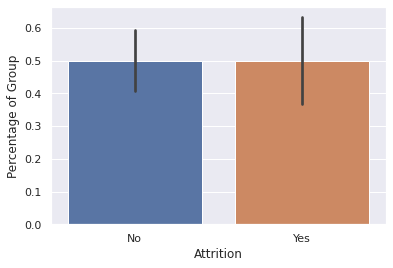

In [81]:
sns.barplot(x='Attrition', y='Percentage of Group', data=newdf)

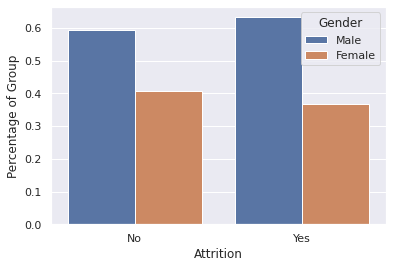

In [82]:
sns.barplot(x='Attrition', y='Percentage of Group', hue='Gender', data=newdf)

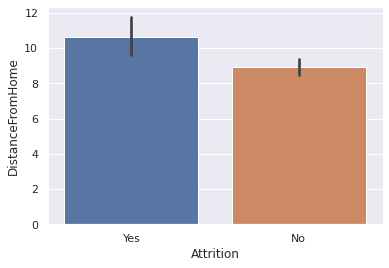

In [83]:
sns.barplot(x='Attrition', y='DistanceFromHome', data=df)

**Task 4:**

         Which Employees are more likely to leave? Senior Employees or Recent Joinees, and does the years spent at the company affect Attrition?



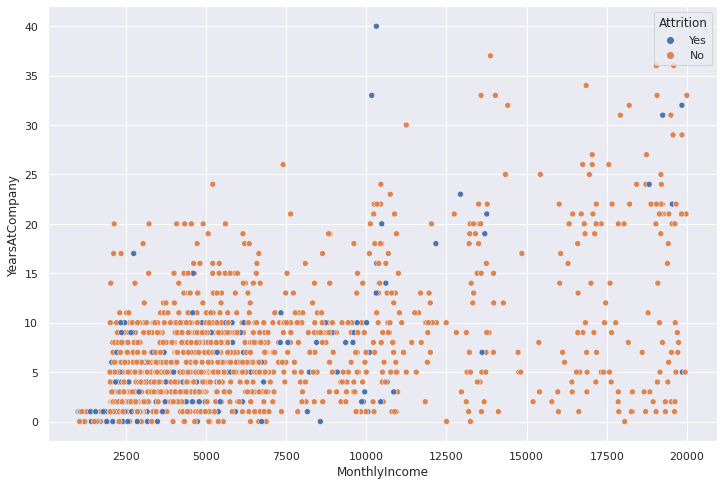

In [84]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['MonthlyIncome'], y=df['YearsAtCompany'], hue=df['Attrition'])

**Task 5:**

         Are Employees in a particular Job Role more likely to quit?
         Does Job Level of employees influence Attrition rate?



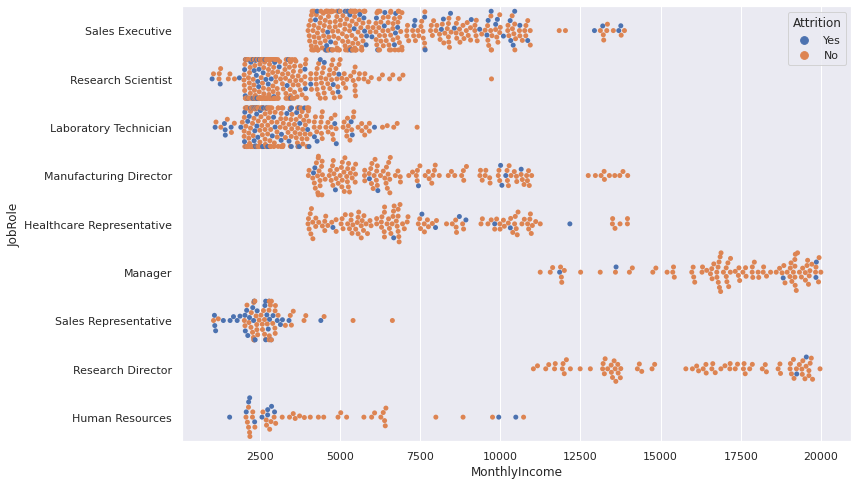

In [85]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='MonthlyIncome', y='JobRole', hue=df['Attrition'], data=df)

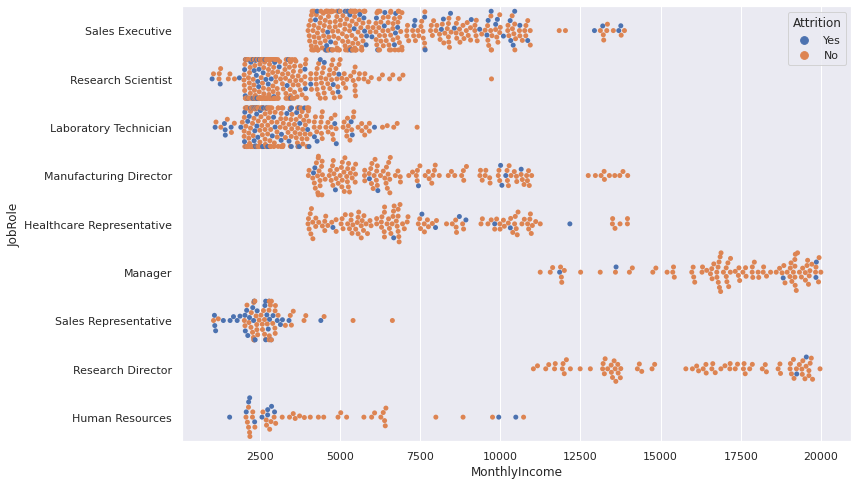

In [86]:
plt.figure(figsize=(12,8))
sns_plot = sns.swarmplot(x='MonthlyIncome', y='JobRole', hue=df['Attrition'], data=df)
fig = sns_plot.get_figure()
fig.savefig('swarmplot.jpg')
plt.show()

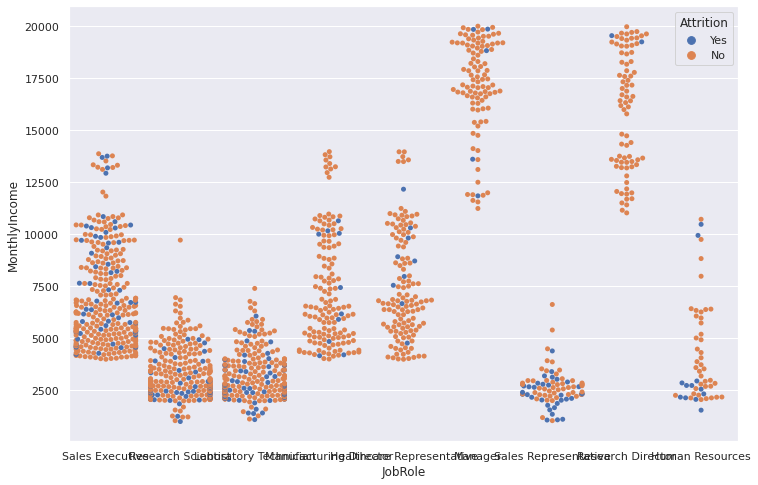

In [87]:
plt.figure(figsize=(12,8))
sns_plot = sns.swarmplot(y='MonthlyIncome', x='JobRole', hue=df['Attrition'], data=df)

**Task 6:**

         Analyze the Monthly Income of Employees in various Deparments such as Sales, Research & Development, and Human Resource?



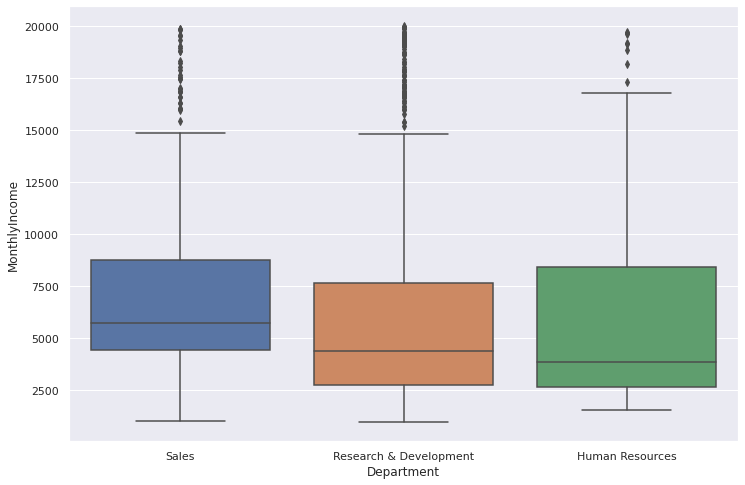

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)

**Task 7:**

        Analyze the impact of Age on Monthly Income using a Joint Plot

<Figure size 864x576 with 0 Axes>

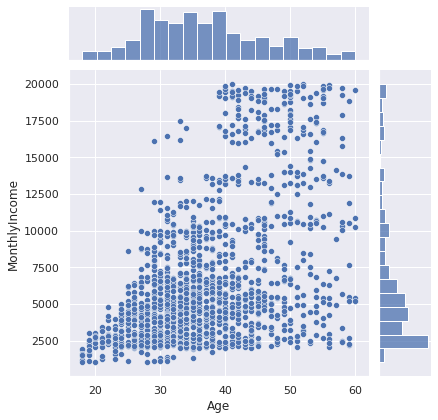

In [89]:
plt.figure(figsize=(12,8))
sns.jointplot(df.Age, df.MonthlyIncome, kind='scatter')

## Plotly Express

In [90]:
import numpy as np
import pandas as pd
import plotly.express as px

### Explore the Gapminder Dataset provided with Plotly Express

In [91]:
gapminder = px.data.gapminder()
print(gapminder.shape)
gapminder.head()

(1704, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [92]:
gapminder.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [93]:
gapminder[gapminder.continent == 'Asia']['country'].unique()

array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
       'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore',
       'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.'], dtype=object)

In [94]:
gapminder.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [95]:
data_canada = px.data.gapminder().query("country == 'Canada'")
print(data_canada.shape)
data_canada.head()

(12, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.75,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.96,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.30,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.13,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.88,22284500,18970.57086,CAN,124


In [96]:
data_canada = gapminder.query("country == 'Canada'")
print(data_canada.shape)
data_canada.head()

(12, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.75,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.96,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.30,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.13,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.88,22284500,18970.57086,CAN,124


### Bar Chart

In [97]:
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [98]:
fig = px.bar(data_canada, x='year', y='pop', hover_data=['lifeExp','gdpPercap'], color = 'gdpPercap')
fig.show()

### Scatter plot
Life Expectancy v/s GDP per capita for year 2007

In [99]:
gapminder2007 = gapminder.query("year == 2007")
px.scatter(gapminder2007, x='gdpPercap', y='lifeExp')

In [100]:
px.scatter(gapminder2007, x='gdpPercap', y='lifeExp', color='continent', hover_name='country')

In [101]:
px.scatter(gapminder2007, x='gdpPercap', y='lifeExp', size='pop', color='continent', hover_name='country')

### Animated Bubble Chart

In [102]:
gapminder.lifeExp.max(), gapminder.lifeExp.min(), gapminder.gdpPercap.max(), gapminder.gdpPercap.min()

(82.603, 23.599, 113523.1329, 241.1658765)

In [103]:
px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', color='continent', hover_name='country',
           animation_frame = 'year', range_x = [100, 50000], range_y = [20, 90])

In [104]:
px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', color='continent', hover_name='country',
           animation_frame = 'year', range_x = [100, 50000], range_y = [20, 90], log_x=True)

### Animated Facet Plot

In [105]:
px.scatter(gapminder2007, x='gdpPercap', y='lifeExp', size='pop', size_max=60, color='continent', hover_name='country',
           facet_col='continent', log_x=True)

In [106]:
px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', size_max=60, color='continent', hover_name='country',
           facet_col='continent', log_x=True, animation_frame='year', range_x = [100, 50000], range_y = [20, 90])

### Geographic Data as Animated Maps

In [107]:
px.choropleth(gapminder2007, locations='iso_alpha', color='lifeExp', hover_name='country' , 
              projection='natural earth1')

In [108]:
px.choropleth(gapminder, locations='iso_alpha', color='lifeExp', hover_name='country' , 
              animation_frame='year', range_color=[20, 80],projection='natural earth')

## Some Basic Plots in Plotly Express

In [109]:
px.scatter(gapminder2007, x='gdpPercap', y='lifeExp', size='pop', color='continent', hover_name='country')

In [110]:
px.line(x=['Jan', 'Feb', 'Mar','Apr', 'May', 'June'], y = [25, 28, 35, 29, 45, 51],
        labels = {'x': 'Months', 'y':'Sales (in Millions)'})

In [111]:
data_europe = gapminder.query("continent == 'Europe' ")
px.line(data_europe, x='year', y='lifeExp', line_group='country', color='country', hover_name='country')

In [112]:
px.bar(x=[0,1,2,3,4], y=[10, 15, 18, 16, 30])

In [113]:
data_e2007 = data_europe.query("year == 2007")
px.pie(data_e2007, values='pop', names='country', title='Europe Population (2007)')

In [114]:
data = [[1, 20, 30],
        [20, 1, 60],
        [-20, 50, -8]]
px.imshow(data)

## Pandas Profiling

In [115]:
from pandas_profiling import ProfileReport

In [116]:
profile = ProfileReport(df)

TypeError: ignored